In [1]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets

pynbody : Verbose mode is on


In [2]:
@pynbody.derived_array
def thricethemass(sim):
    return sim['mass']*3

In [3]:
SIMPATH = '/media/michele/My Book/Michele/MySimulations/MovingBox/beta/mb.71002/p300_a800_r600/out'

In [4]:
# sim = simulation.Simulation(SIMPATH)
snap = pynbody.load(os.path.join(SIMPATH, 'snapshot_0012'))

pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.gadget.GadgetSnap'>


In [5]:
snap

<SimSnap "/media/michele/My Book/Michele/MySimulations/MovingBox/beta/mb.71002/p300_a800_r600/out/snapshot_0012" len=456942>

In [6]:
snap.s['mgst'], snap.s['fest']

(SimArray([  4.52844204e-18,   1.52136531e-17,   0.00000000e+00, ...,
             2.52294693e-16,   4.63360849e-13,   0.00000000e+00], dtype=float32),
 SimArray([  2.78957335e-18,   9.37178925e-18,   0.00000000e+00, ...,
             1.55416504e-16,   2.85435710e-13,   0.00000000e+00], dtype=float32))

### Use kdtree

In [7]:
snap.s['smooth'], snap.s['rho']

pynbody.snapshot : Deriving array smooth
pynbody.sph : Building tree with leafsize=16
pynbody.sph : Tree build done in 0.0195 s
pynbody.sph : Smoothing with 50 nearest neighbours
pynbody.sph : Smoothing done in 0.00623s
pynbody.snapshot : Deriving array rho
pynbody.sph : Calculating SPH density
pynbody.sph : Density calculation done in 0.00504 s


(SimArray([ 10.0372715 ,   9.14416122,   8.6727457 , ...,   9.62159252,
            11.22772026,  10.65406036], dtype=float32, 'kpc'),
 SimArray([  8.33985603e-10,   1.77489012e-09,   2.22782970e-09, ...,
             2.00964356e-09,   1.18864785e-09,   1.51096313e-09], dtype=float32, '1.00e+10 Msol kpc**-3'))

In [8]:
snap.s['mgst_sph'] = snap.s.kdtree.sph_mean(snap.s['mgst'])
snap.s['fest_sph'] = snap.s.kdtree.sph_mean(snap.s['fest'])
snap.s['mass_sph'] = snap.s.kdtree.sph_mean(snap.s['mass'])

pynbody.sph.kdtree : Smoothing array with 64 nearest neighbours
pynbody.sph.kdtree : SPH smooth done in 0.0132 s
pynbody.sph.kdtree : Smoothing array with 64 nearest neighbours
pynbody.sph.kdtree : SPH smooth done in 0.00834 s
pynbody.sph.kdtree : Smoothing array with 64 nearest neighbours
pynbody.sph.kdtree : SPH smooth done in 0.0126 s


In [9]:
snap.s['mgst'].min(), snap.s['mgst'].max()

(SimArray(0.0, dtype=float32), SimArray(7.924007006110401e-10, dtype=float32))

In [10]:
snap.s['mgst_sph'].min(), snap.s['mgst_sph'].max()

(SimArray(3.1318712352482734e-18, dtype=float32),
 SimArray(2.6859664492562274e-10, dtype=float32))

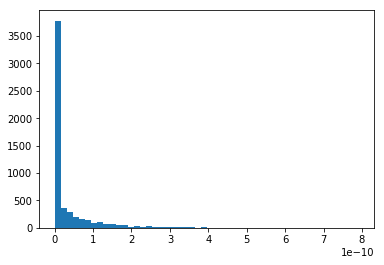

In [11]:
plt.hist(snap.s['mgst'], bins=50);

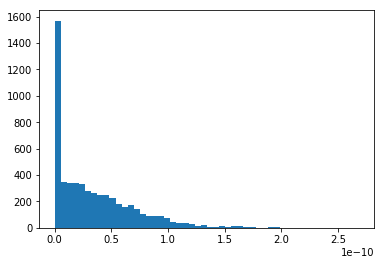

In [12]:
plt.hist(snap.s['mgst_sph'], bins=50);

it is smeared out

## Trying to see which is the difference between the mass array and the smoothed mass array

In [13]:
snap.s['mass_sph'], snap.s['mass']

(SimArray([  3.55982735e-07,   5.65056610e-07,   6.71844987e-07, ...,
             9.28981365e-07,   6.03464457e-07,   7.35859658e-07], dtype=float32, '1.00e+10 Msol'),
 SimArray([  6.74464161e-07,   6.74286071e-07,   6.74273224e-07, ...,
             6.74280216e-07,   1.05205538e-06,   6.74272655e-07], dtype=float32, '1.00e+10 Msol'))

In [14]:
snap.s['mass'].min(), snap.s['mass'].max()

(SimArray(6.740278877259698e-07, dtype=float32, '1.00e+10 Msol'),
 SimArray(1.0888942370002042e-06, dtype=float32, '1.00e+10 Msol'))

In [15]:
snap.s['mass_sph'].min(), snap.s['mass_sph'].max()

(SimArray(3.104282200183661e-07, dtype=float32, '1.00e+10 Msol'),
 SimArray(1.2064042493875604e-06, dtype=float32, '1.00e+10 Msol'))

(SimArray(6.740278877259698e-07, dtype=float32, '1.00e+10 Msol'),
 SimArray(1.0888942370002042e-06, dtype=float32, '1.00e+10 Msol'))

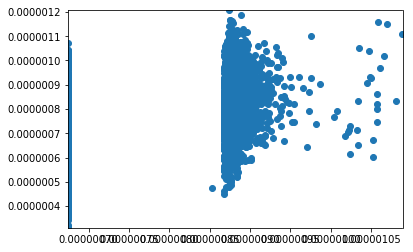

In [16]:
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.scatter(snap.s['mass'], snap.s['mass_sph'])
ax.set_ylim(snap.s['mass_sph'].min(), snap.s['mass_sph'].max())
ax.set_xlim(snap.s['mass'].min(), snap.s['mass'].max())

### Creating derived arrays

In [17]:
MgFe_sol = -0.261299
FeH_sol = -2.756433

@pynbody.derived_array
def mgfe(snap):
    arr = np.log10(snap.s['mgst_sph']/snap.s['fest_sph']) - MgFe_sol
    arr[np.logical_or(snap.s['mgst_sph'] == 0.0, snap.s['fest_sph'] == 0.0)] = 0.471782
    return arr

@pynbody.derived_array
def feh(snap):
    arr = np.log10(snap.s['fest_sph']/snap.s['mass_sph']) - FeH_sol
    arr[np.logical_or(snap.s['fest_sph'] == 0.0, snap.s['mass_sph'] == 0.0)] = -98.0
    return arr

In [18]:
# MgFe_sol = -0.261299
# FeH_sol = -2.756433

# @pynbody.derived_array
# def mgfe(snap):
#     arr = np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol
#     arr[np.logical_or(snap.s['mgst'] == 0.0, snap.s['fest'] == 0.0)] = 0.471782
#     return arr

# @pynbody.derived_array
# def feh(snap):
#     arr = np.log10(snap.s['fest']/snap.s['mass']) - FeH_sol
#     arr[np.logical_or(snap.s['fest'] == 0.0, snap.s['mass'] == 0.0)] = -98.0
#     return arr

pynbody.snapshot : Deriving array feh
pynbody.snapshot : Deriving array mgfe
pynbody.snapshot : Deriving array age


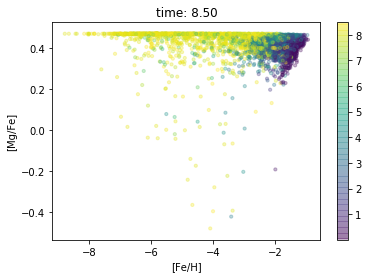

In [19]:
fig, ax = plt.subplots(1, figsize=(6,4))
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[Mg/Fe]')
scatter = ax.scatter(snap.s['feh'], snap.s['mgfe'], alpha=0.3, s=10, c=snap.s['age'])
fig.colorbar(scatter)
ax.set_title('time: {:.2f}'.format(snap.header.time));

/home/michele/Software/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'xlabel', 'ylabel'
  s)


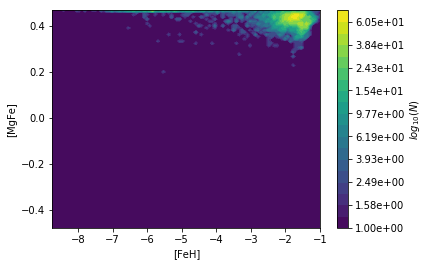

In [20]:
pynbody.plot.generic.hist2d(snap.s['feh'], snap.s['mgfe'], xlabel='[FeH]', ylabel='[MgFe]', colorbar=True);

In [22]:
sim = simulation.Simulation(SIMPATH)

Found trace file


In [23]:
from pynbody import filt
popIII_filt = filt.BandPass('feh', -5, 100)

In [26]:
snap_slider = ipywidgets.IntSlider(min=0,max=len(sim)-1,step=1,value=0, continuous_update=False, description='Snap:')
def k(i):
    snap = sim[i].s
#     snap.s['mgfe'] = mgfe(snap)
#     snap.s['feh'] = feh(snap)
    
    subsnap = snap[popIII_filt]
    # I need to initialize these two
    subsnap.s['smooth'], subsnap.s['rho']
    
    subsnap.s['mgst_sph'] = snap.s.kdtree.sph_mean(subsnap.s['mgst'])
    subsnap.s['fest_sph'] = snap.s.kdtree.sph_mean(subsnap.s['fest'])
    subsnap.s['mass_sph'] = snap.s.kdtree.sph_mean(subsnap.s['mass'])
#     snap.s['mgfe'] = np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol
#     snap.s['feh'] = np.log10(snap.s['fest']/snap.s['mass']) - FeH_sol

    fig, ax = plt.subplots(1, figsize=(6,4))
    ax.set_xlabel('[Fe/H]')
    ax.set_ylabel('[Mg/Fe]')
    scatter = ax.scatter(subsnap.s['feh'], subsnap.s['mgfe'], alpha=0.3, s=10, c=subsnap.s['age'])
    fig.colorbar(scatter)
    ax.set_title('time: {:.2f}'.format(snap.header.time));
    return fig

w = ipywidgets.interactive(k, i=snap_slider)
#                         velocity_proj=_proj,
#                         sfh=_sfh,
#                         cog=_traj,
#                         vrange=_vminmax,
#                         width=_width_slider,
#                         resolution=_res_slider)
w

interactive(children=(IntSlider(value=0, continuous_update=False, description='Snap:', max=446), Output()), _d…